In [2]:
import pandas as pd
import numpy as np
import json
train_OG =  pd.read_csv("../data/train_data_og.csv")
test_OG =  pd.read_csv("../data/test_data_og.csv")

#data =  pd.read_csv("../data/output_data.csv")



In [3]:
from imblearn.under_sampling import RandomUnderSampler

def random_undersample(train_data):
    rus = RandomUnderSampler()
    X = train_data.drop(columns = ["label","gene_id","Transcript_ID","Base_seq"])
    Y = train_data['label'] 
    X_resampled, y_resampled = rus.fit_resample(X, Y)
    output = pd.concat([X_resampled,y_resampled],axis = 1) 
    return output

new_train_data = random_undersample(train_OG)
X_train = new_train_data.drop('label', axis=1)
Y_train = new_train_data['label']
X_test = test_OG.drop(columns = ["label","gene_id","Transcript_ID","Base_seq"],axis = 1)
Y_test = test_OG['label']

In [4]:
pos = new_train_data[new_train_data['label'] == 1]
print(len(pos)/len(new_train_data))
print(len(new_train_data))

111170
222340


In [2]:
data.head()

,Unnamed: 0,gene_id,Transcript_ID,Position,label,Base_seq,PC1m,PC2m,PC3m,PC4m,PC1s,PC2s,PC3s,PC4s,PC5s,PC6s
0,0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,2.745863,0.048319,-0.142728,0.066868,2.613460,0.207847,-0.572925,0.721853,-0.718214,-0.434759
1,1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,-1.395621,-0.195111,1.337965,-0.685107,-0.250673,0.751076,0.332955,-0.519130,-0.416041,0.482546
2,2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,-1.787675,-0.325734,0.632243,0.061908,-1.537677,-0.518765,-0.712981,-1.054358,-0.179635,-0.284206
3,3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,-1.028029,2.738169,-0.800930,0.618056,-0.437836,0.193370,-0.087304,1.505729,1.346359,1.310832
4,4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,2.637975,1.716605,1.754123,0.761242,0.509573,-0.767346,-1.937101,0.165017,0.805025,1.495517


In [2]:
data = data.rename(columns={'0': 'Transcript_ID', '1': 'Position',"2":"Base_seq","3":"Sample_reads"})

In [3]:
data_info = pd.read_csv("../data/data.info")


In [4]:
# Mean and std
def feature_engin1(rows):
    sample_reads = json.loads(rows["Sample_reads"])
    output = {"Mean":[],"Standard_deviation":[]}
    matrix = np.array(sample_reads)
    column_means = np.mean(matrix, axis=0)
    column_std = np.std(matrix,axis=0)
    output = [list(column_means),list(column_std)]
    return output

In [5]:
data["Compiled_reads"] = data.apply(feature_engin1,axis=1)
#json.loads(data.iloc[0]["Sample_reads"])

In [7]:
data.head()

,Transcript_ID,Position,Base_seq,Sample_reads,Compiled_reads
0,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0...","[[0.008264378378378385, 4.223783783783786, 123..."
1,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0....","[[0.006609244186046515, 3.2164244186046504, 10..."
2,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0...","[[0.0075699999999999995, 2.94054054054054, 105..."
3,ENST00000000233,332,AGAACAT,"[[0.0134, 4.71, 132.0, 0.00447, 4.24, 98.8, 0....","[[0.010620250000000005, 6.4763499999999965, 12..."
4,ENST00000000233,368,AGGACAA,"[[0.015, 6.97, 118.0, 0.0106, 3.04, 123.0, 0.0...","[[0.010700505050505058, 6.415050505050505, 117..."


In [6]:
data = data[['Transcript_ID', 'Position', 'Base_seq', 'Compiled_reads']]

In [9]:
data.head()

,Transcript_ID,Position,Base_seq,Compiled_reads
0,ENST00000000233,244,AAGACCA,"[[0.008264378378378385, 4.223783783783786, 123..."
1,ENST00000000233,261,CAAACTG,"[[0.006609244186046515, 3.2164244186046504, 10..."
2,ENST00000000233,316,GAAACAG,"[[0.0075699999999999995, 2.94054054054054, 105..."
3,ENST00000000233,332,AGAACAT,"[[0.010620250000000005, 6.4763499999999965, 12..."
4,ENST00000000233,368,AGGACAA,"[[0.010700505050505058, 6.415050505050505, 117..."


In [7]:
# Use apply and pd.Series to split the lists into separate columns
new_columns = data['Compiled_reads'].apply(pd.Series).apply(pd.Series)
new_columns = pd.concat([new_columns[0].apply(pd.Series), new_columns[1].apply(pd.Series)], axis = 1)


new_columns.columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9',
              'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']

# Combine the new columns with the original DataFrame
data = pd.concat([data, new_columns], axis=1)

# Drop the original 'your_column' if you no longer need it
data = data.drop('Compiled_reads', axis=1)

# Display the resulting DataFrame
data.head()


,Transcript_ID,Position,Base_seq,mean1,mean2,mean3,mean4,mean5,mean6,mean7,...,mean9,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,80.570270,0.005384,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,94.290698,0.003588,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,89.364324,0.004444,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,89.154000,0.006121,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,85.178788,0.007151,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045


In [8]:
data_info.head()
data_info = data_info.rename(columns={'transcript_id': 'Transcript_ID'})

In [9]:
merged_right = pd.merge(data_info, data, on='Transcript_ID', how='right')
gene_ids = list(set(merged_right.gene_id))
len(gene_ids)

3852

In [10]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(gene_ids,test_size=0.3,random_state = 40)

In [11]:
train_data = merged_right[merged_right["gene_id"].isin(train)]
test_data = merged_right[merged_right["gene_id"].isin(test)]

In [12]:
train_data.to_csv("train_data_og.csv")
test_data.to_csv("test_data_og.csv")

In [26]:
len(train_data)
len(test_data)/len(merged_right)

0.31875393881598035

In [14]:
train_data.head()

,gene_id,Transcript_ID,transcript_position,label,Position,Base_seq,mean1,mean2,mean3,mean4,...,mean9,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9
324,ENSG00000003056,ENST00000000412,355,0,355,GAAACTA,0.00734,2.97718,108.36,0.007782,...,94.174,0.005107,1.990891,2.535823,0.004261,0.719533,3.858049,0.00294,0.457482,1.973506
325,ENSG00000003056,ENST00000000412,367,0,355,GAAACTA,0.00734,2.97718,108.36,0.007782,...,94.174,0.005107,1.990891,2.535823,0.004261,0.719533,3.858049,0.00294,0.457482,1.973506
326,ENSG00000003056,ENST00000000412,496,0,355,GAAACTA,0.00734,2.97718,108.36,0.007782,...,94.174,0.005107,1.990891,2.535823,0.004261,0.719533,3.858049,0.00294,0.457482,1.973506
327,ENSG00000003056,ENST00000000412,501,0,355,GAAACTA,0.00734,2.97718,108.36,0.007782,...,94.174,0.005107,1.990891,2.535823,0.004261,0.719533,3.858049,0.00294,0.457482,1.973506
328,ENSG00000003056,ENST00000000412,547,0,355,GAAACTA,0.00734,2.97718,108.36,0.007782,...,94.174,0.005107,1.990891,2.535823,0.004261,0.719533,3.858049,0.00294,0.457482,1.973506


In [15]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.under_sampling import RandomUnderSampler

In [16]:
def random_undersample(train_data):
    rus = RandomUnderSampler()
    X = train_data.drop(columns = ["label","gene_id","Transcript_ID","Base_seq"])
    Y = train_data['label'] 
    X_resampled, y_resampled = rus.fit_resample(X, Y)
    output = pd.concat([X_resampled,y_resampled],axis = 1) 
    return output

def GANsampling(train_data,no_of_samples = 50000):
    data = train_data.drop(columns = ["gene_id","Transcript_ID","Base_seq"])
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=data)
    metadata.update_column("label",sdtype="categorical")
    CTGAN = CTGANSynthesizer(
        metadata, 
        enforce_rounding=False,
        epochs=50,
        verbose=False
    )
    CTGAN.fit(data)
    CT_samples = CTGAN.sample(num_rows=no_of_samples)
    New_positive = CT_samples[CT_samples["label"] == 1]
    output = pd.concat([data,New_positive],axis = 0, ignore_index = True) 
    return output

def adasyn_sample(train):
    X = train.drop(columns = ["label","gene_id","Transcript_ID","Base_seq"])
    y = train['label']
    adasyn_model = ADASYN(sampling_strategy='auto', random_state=42)
    X_adasyn_sample, y_adasyn_sample = adasyn_model.fit_resample(X, y)
    output = pd.concat([X_adasyn_sample, y_adasyn_sample], axis=1)
    return output

In [21]:
#train_data1 = random_undersample(train_data)
#train_data2 = GANsampling(train_data)
#train_data3 = adasyn_sample(train_data)
new_train_data = random_undersample(train_data)
X_train = new_train_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']]
Y_train = new_train_data['label']
X_test = test_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']]
Y_test = test_data['label']

In [18]:
print(len(new_train_data))

238588


In [22]:
X_train.head()

,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9
1657348,0.006860,9.882745,115.901961,0.004897,5.000980,94.180392,0.006540,3.085294,83.649020,0.004655,2.125470,3.996346,0.002638,2.272251,6.304061,0.003068,1.239191,2.702096
3045845,0.006505,8.623117,115.246753,0.007575,4.603636,93.790909,0.007212,2.107987,82.184416,0.003928,2.649754,6.000337,0.004191,1.694232,5.369930,0.003587,0.637751,1.910400
144270,0.005460,8.039074,116.962963,0.006001,4.769074,100.946296,0.008147,2.463352,91.405556,0.002911,2.487496,3.814995,0.002752,2.633244,4.505129,0.005376,0.712925,2.667529
4128722,0.007464,4.368246,120.894737,0.008017,4.898596,132.438596,0.006815,5.525789,85.692982,0.004254,1.259318,4.666733,0.004554,1.971107,3.857176,0.003671,2.832443,3.859273
2892591,0.005848,7.423623,119.101449,0.007028,4.420870,100.398551,0.007577,2.922754,91.110145,0.002713,2.490347,5.413737,0.003606,2.396858,3.753510,0.003794,1.436981,2.528684


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# X_train = train_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']]
# Y_train = train_data['label']
# X_test = test_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']]
# Y_test = test_data['label']

X_train = train_data1[['PC1m', 'PC2m', 'PC3m', 'PC4m', 'PC1s', 'PC2s', 'PC3s', 'PC4s', 'PC5s', 'PC6s']]
Y_train = train_data1['label']

# X_train2 = train_data2[['PC1m', 'PC2m', 'PC3m', 'PC4m', 'PC1s', 'PC2s', 'PC3s', 'PC4s', 'PC5s', 'PC6s']]
# Y_train2 = train_data2['label']

# X_train3 = train_data3[['PC1m', 'PC2m', 'PC3m', 'PC4m', 'PC1s', 'PC2s', 'PC3s', 'PC4s', 'PC5s', 'PC6s']]
# Y_train3 = train_data3['label']

# X_train = train_data[['PC1m', 'PC2m', 'PC3m', 'PC4m', 'PC1s', 'PC2s', 'PC3s', 'PC4s', 'PC5s', 'PC6s']]
# Y_train = train_data['label']

X_test = test_data[['PC1m', 'PC2m', 'PC3m', 'PC4m', 'PC1s', 'PC2s', 'PC3s', 'PC4s', 'PC5s', 'PC6s']]
Y_test = test_data['label']

In [38]:
#Neural network
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


# Create a sequential neural network model
model = keras.Sequential()

# Add input layer
model.add(keras.layers.Input(shape=(18,)))  # 18 input features

# Add hidden layers
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))

# Add output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Binary classification, so use 'sigmoid' activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Make predictions
Y_pred = model.predict(X_test)

# You can then use these predictions for further analysis or evaluation.


Epoch 1/20
1227/7456 [===>..........................] - ETA: 27s - loss: 0.7070 - accuracy: 0.5246

In [ ]:
model.save('nn_gene.h5')

In [37]:
print(Y_pred)

[[0.49649364]
 [0.49649364]
 [0.49649364]
 ...
 [0.49649364]
 [0.49649364]
 [0.49649364]]


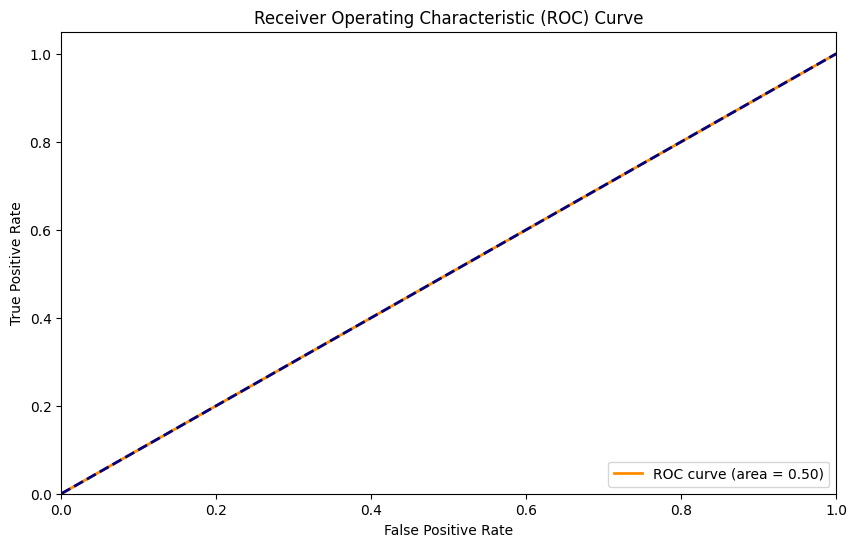

In [36]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
#accuracy = accuracy_score(Y_test, Y_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [16]:
# Create a Random Forest Classifier
rf_classifier_sample = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier_gan = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
# rf_classifier_sample.fit(X_train1, Y_train1)
rf_classifier_sample.fit(X_train, Y_train)
# rf_classifier_adasyn.fit(X_train3, Y_train3)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test data
Y_pred1 = rf_classifier_sample.predict(X_test)
# Y_pred2 = rf_classifier_gan.predict(X_test)
# Y_pred3 = rf_classifier_adasyn.predict(X_test)

# Calculate accuracy
accuracy1 = accuracy_score(Y_test, Y_pred1)
# accuracy2 = accuracy_score(Y_test, Y_pred2)
# accuracy3 = accuracy_score(Y_test, Y_pred3)
print(f'Accuracy: {accuracy1 * 100:.2f}%')
# print(f'Accuracy: {accuracy2 * 100:.2f}%')
# print(f'Accuracy: {accuracy3 * 100:.2f}%')

Accuracy: 95.44%


In [ ]:
import joblib
joblib.dump(rf_classifier_sample, '../model/random_forest_model_sample.pkl')
# joblib.dump(rf_classifier_gan, '../model/random_forest_model_gan.pkl')
# joblib.dump(rf_classifier_adasyn, '../model/random_forest_model_adasyn.pkl')

['../model/random_forest_model.pkl']